In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('G:/Stuff/risk_factors_cervical_cancer.csv')

In [187]:
df.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [6]:
df.shape

(858, 36)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [17]:
df.isin(['?']).sum(axis=0)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [51]:
df.loc[df['STDs']== '?','STDs':'STDs:HPV']

,STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV
71,?,?,?,?,?,?,?,?,?,?,?,?,?,?
74,?,?,?,?,?,?,?,?,?,?,?,?,?,?
90,?,?,?,?,?,?,?,?,?,?,?,?,?,?
95,?,?,?,?,?,?,?,?,?,?,?,?,?,?
98,?,?,?,?,?,?,?,?,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,?,?,?,?,?,?,?,?,?,?,?,?,?,?
794,?,?,?,?,?,?,?,?,?,?,?,?,?,?
807,?,?,?,?,?,?,?,?,?,?,?,?,?,?
814,?,?,?,?,?,?,?,?,?,?,?,?,?,?


In [55]:
df[df['STDs']=='?'].index

Int64Index([ 71,  74,  90,  95,  98, 102, 111, 117, 141, 142,
            ...
            772, 778, 783, 785, 788, 792, 794, 807, 814, 816],
           dtype='int64', length=105)

In [35]:
df1=df.drop(df[df['STDs']=='?'].index,axis=0)

In [36]:
df1.shape

(753, 36)

In [52]:
df1.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1,inplace=True)

In [53]:
df1.head(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [63]:
a=df1[df1['Smokes']=='?'].index

In [65]:
df1.drop(a,axis=0,inplace=True)

In [67]:
b=df1[df1['Hormonal Contraceptives']=='?'].index
df1.drop(b,axis=0,inplace=True)

In [68]:
c=df1[df1['IUD']=='?'].index
df1.drop(c,axis=0,inplace=True)

In [70]:
df1.shape

(726, 34)

In [71]:
df1.drop(df1[df1['Number of sexual partners']=='?'].index,axis=0,inplace=True)

In [72]:
df1.drop(df1[df1['First sexual intercourse']=='?'].index,axis=0,inplace=True)

In [73]:
df1.drop(df1[df1['Num of pregnancies']=='?'].index,axis=0,inplace=True)

In [74]:
df1.shape

(668, 34)

In [75]:
df1.isin(['?']).sum(axis=0)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [79]:
df1['Biopsy'].value_counts()

0    623
1     45
Name: Biopsy, dtype: int64

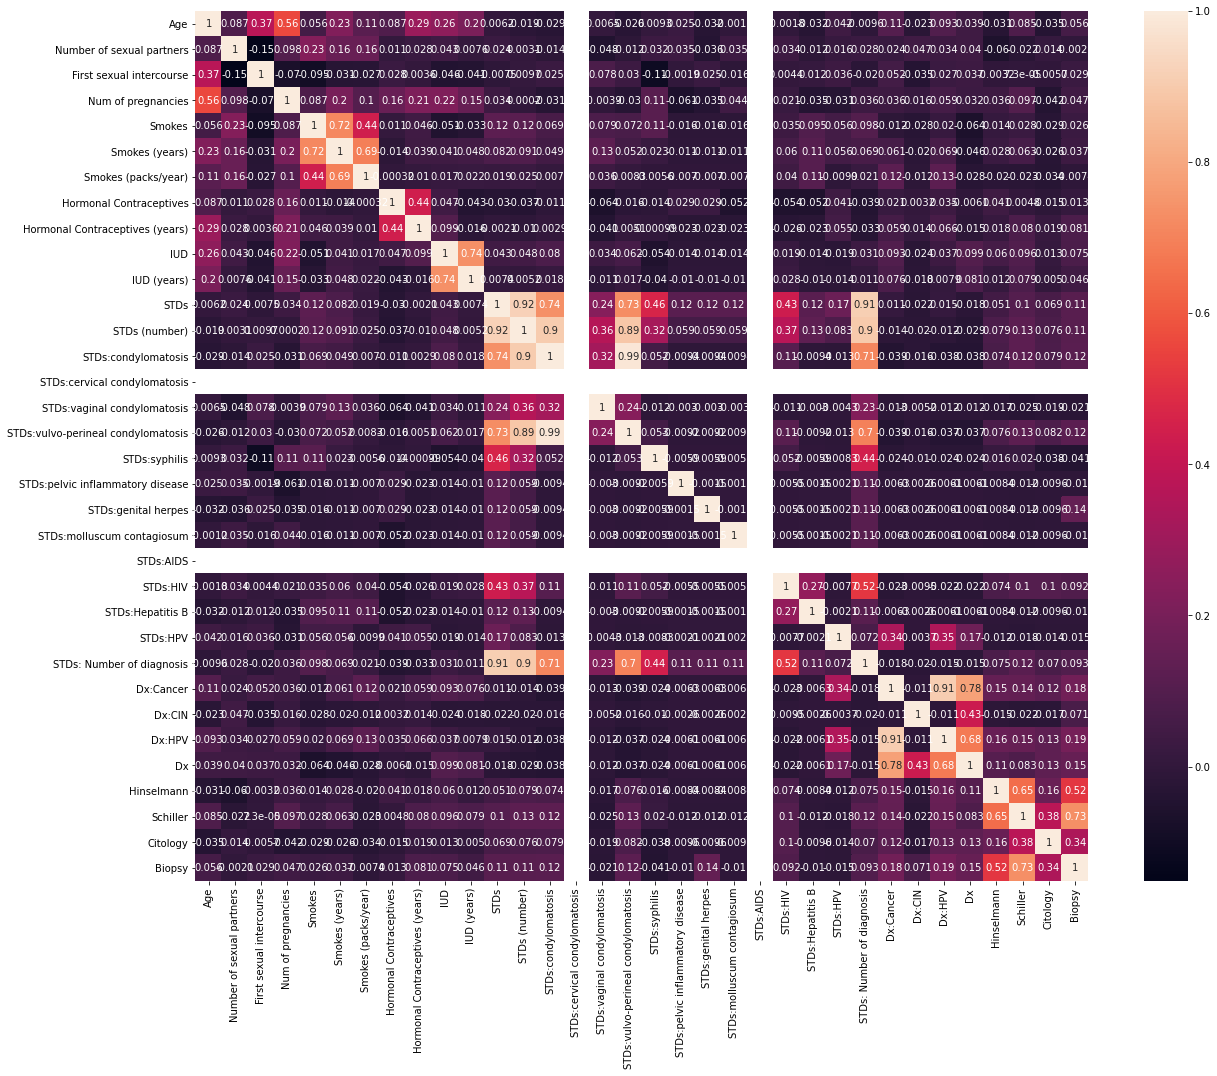

In [95]:
plt.figure(figsize=(20,16))
sns.heatmap(df1.corr(),annot=True)

In [85]:
df1.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [93]:
df1[['Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV']]=df1[['Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV']].astype('int64')

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    int64  
 1   Number of sexual partners           668 non-null    float64
 2   First sexual intercourse            668 non-null    float64
 3   Num of pregnancies                  668 non-null    float64
 4   Smokes                              668 non-null    int64  
 5   Smokes (years)                      668 non-null    int64  
 6   Smokes (packs/year)                 668 non-null    int64  
 7   Hormonal Contraceptives             668 non-null    int64  
 8   Hormonal Contraceptives (years)     668 non-null    int64  
 9   IUD                                 668 non-null    int64  
 10  IUD (years)                         668 non-null    int64  
 11  STDs                                668 non-n

In [102]:
X=df1.drop(['Biopsy'],axis=1)
Y=df1['Biopsy']

In [103]:
X.shape,Y.shape

((668, 33), (668,))

In [124]:
df1['Biopsy'].value_counts()

0    623
1     45
Name: Biopsy, dtype: int64

In [121]:
from imblearn.over_sampling import RandomOverSampler

In [122]:
ros=RandomOverSampler(sampling_strategy=1.0,random_state=42)
X_ros,Y_ros=ros.fit_sample(X,Y)

In [123]:
X_ros.shape,Y_ros.shape

((1246, 33), (1246,))

In [125]:
Y_ros.value_counts()

1    623
0    623
Name: Biopsy, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [126]:
x_train,x_test,y_train,y_test =train_test_split(X_ros,Y_ros,random_state=0,test_size=0.25)

In [154]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
(LR.score(x_test,y_test)*100).round()

c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


94.0

In [128]:
LR.score(x_train,y_train)*100

94.75374732334048

In [155]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
(RF.score(x_test,y_test)*100).round()

98.0

In [130]:
RF.score(x_train,y_train)*100

100.0

In [156]:
XGB=XGBClassifier()
XGB.fit(x_train,y_train)
(XGB.score(x_test,y_test)*100).round()

98.0

In [132]:
XGB.score(x_train,y_train)*100

100.0

In [157]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
(KNN.score(x_test,y_test)*100).round()

97.0

In [134]:
KNN.score(x_train,y_train)*100

95.61027837259101

In [135]:
y_pred_LR=LR.predict(x_test)
y_pred_RF=RF.predict(x_test)
y_pred_XGB=XGB.predict(x_test)
y_pred_KNN=KNN.predict(x_test)

### Confusion_matrix

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [136]:
confusion_matrix(y_pred_KNN,y_test)

array([[130,   0],
       [ 20, 162]], dtype=int64)

In [138]:
confusion_matrix(y_pred_XGB,y_test)

array([[145,   0],
       [  5, 162]], dtype=int64)

In [139]:
confusion_matrix(y_pred_RF,y_test)

array([[145,   0],
       [  5, 162]], dtype=int64)

In [137]:
confusion_matrix(y_pred_LR,y_test)

array([[144,  14],
       [  6, 148]], dtype=int64)

In [140]:
print(classification_report(y_pred_XGB,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       145
           1       1.00      0.97      0.98       167

    accuracy                           0.98       312
   macro avg       0.98      0.99      0.98       312
weighted avg       0.98      0.98      0.98       312



### Cross Validation

In [113]:
from sklearn.model_selection import cross_val_score

In [152]:
KNN_cv =cross_val_score(KNeighborsClassifier(n_neighbors=3),X_ros,Y_ros,cv=10)
(KNN_cv.mean()*100).round()

96.0

In [158]:
XGB_cv =cross_val_score(XGBClassifier(),X_ros,Y_ros,cv=10)
(XGB_cv.mean()*100).round()

98.0

In [159]:
RF_cv =cross_val_score(RandomForestClassifier(),X_ros,Y_ros,cv=10)
(RF_cv.mean()*100).round()

99.0

In [170]:
LR_cv =cross_val_score(LogisticRegression(max_iter=100),X_ros,Y_ros,cv=10)
(LR_cv.mean()*100).round()

c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

94.0

In [172]:
RF_mse =cross_val_score(RandomForestClassifier(),X_ros,Y_ros,cv=10,scoring='neg_mean_squared_error')
RF_mse_score=-(RF_mse)
RF_sqrt=np.sqrt(RF_mse_score)
mean_score=RF_sqrt.mean()
mean_score

0.09824752010753113

In [186]:
RF_mse =cross_val_score(RandomForestClassifier(),X_ros.iloc[:,:30],Y_ros,cv=10,scoring='neg_mean_squared_error')
RF_mse_score=-(RF_mse)
RF_sqrt=np.sqrt(RF_mse_score)
mean_score=RF_sqrt.mean()
mean_score

0.12355441326259879